#Objective:
Evaluate the effect of different team level access points (level 5 vs. level 7) on player engagement and retention.

#Dataset Structure:
id: Unique identifier for each player.

team_level_access: Indicates the experimental group to which the player belongs ('level_5' or 'level_7').

minutes_played: Total minutes played by the player.

day1_retention: Boolean indicating whether the player was active on the first day after joining (TRUE for active, FALSE for inactive).

day7_retention: Boolean indicating whether the player was active on the seventh day after joining (TRUE for active, FALSE for inactive).

#Potential Insights:
The analysis will provide insights into how different access levels to teams influence player behavior in terms of game engagement and retention. This can guide future game design decisions, particularly in relation to team dynamics and access criteria.


In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/A-B Testing and Experimentation/Introduction to A-B Testing

/content/drive/MyDrive/Business Analyst course/A-B Testing and Experimentation/Introduction to A-B Testing


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv('Krushing Kingdoms.csv')

In [ ]:
df.head()

,id,team_level_access,minutes_played,day1_retention,day7_retention
0,250642234,level_5,21,True,False
1,330729049,level_5,1,False,False
2,955307973,level_7,76,True,True
3,908651903,level_7,76,True,False
4,983320188,level_5,1,False,False


In [ ]:
# df infoarmation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 50000 non-null  int64 
 1   team_level_access  50000 non-null  object
 2   minutes_played     50000 non-null  int64 
 3   day1_retention     50000 non-null  bool  
 4   day7_retention     50000 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
#Define Hypotesis

# Null Hypothesis (H0): There is no significant difference in player engagement and retention between teams with level 5 access points and teams with level 7 access points.
# Alternative Hypothesis (H1): There is a significant difference in player engagement and retention between teams with level 5 access points and teams with level 7 access points.

#Exploratory data (EDA)

In [ ]:
#Exploratory data (EDA)

df.describe()
#df['team_level_access'].value_counts()

,id,minutes_played
count,5.000000e+04,50000.000000
mean,5.000967e+08,25.884040
std,2.894632e+08,51.130086
min,7.746000e+03,0.000000
25%,2.502251e+08,3.000000
50%,5.008450e+08,8.000000
75%,7.500803e+08,26.000000
max,9.999952e+08,1481.000000


In [ ]:
#Conclusion: The data has outliers and need to be clean

#minutes_played: A standard deviation of 51.13 minutes indicates that while the mean is 25, there is a wide spread of playtime
#with some players significantly exceeding the mean.

In [ ]:
# 1. Calculate average minutes played by team level access
# Calculate both average and median minutes played
average_median_minutes = df.groupby('team_level_access')['minutes_played'].agg(['mean', 'median']).reset_index()

# Rename the columns for clarity
average_median_minutes.columns = ['team_level_access', 'average_minutes', 'median_minutes']

# Display the result
print(average_median_minutes)





  team_level_access  average_minutes  median_minutes
0           level_5        26.038934             9.0
1           level_7        25.732092             8.0


In [ ]:
# 1. Calculate Day 1 and Day 7 retention rates by team level access
day1_retention_rate = df.groupby('team_level_access')['day1_retention'].mean().reset_index()
day7_retention_rate = df.groupby('team_level_access')['day7_retention'].mean().reset_index()

# 2. Merge retention rates into a single DataFrame
retention_analysis = day1_retention_rate.merge(day7_retention_rate, on='team_level_access', suffixes=('_day1', '_day7'))

# Rename columns for clarity
retention_analysis.columns = ['Team Level Access', 'Day 1 Retention Rate', 'Day 7 Retention Rate']

# 3. Display the retention analysis DataFrame
print(retention_analysis)


  Team Level Access  Day 1 Retention Rate  Day 7 Retention Rate
0           level_5              0.448304              0.189176
1           level_7              0.441561              0.181537


<ipython-input-11-b69f16cb835a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='team_level_access', data=df, palette='Set2')


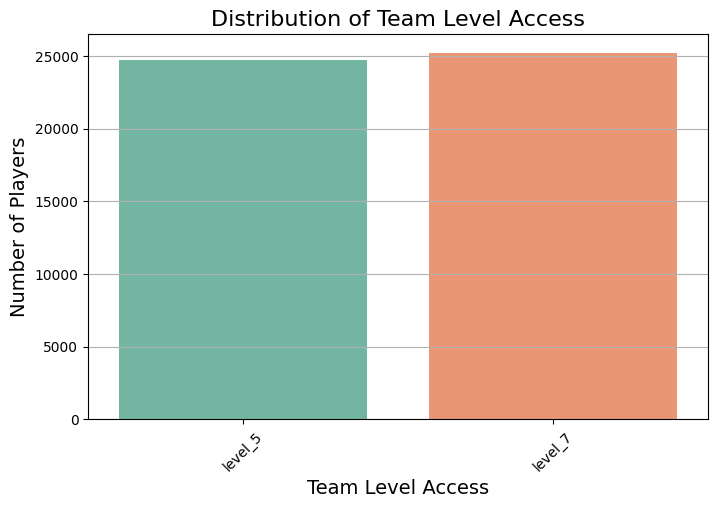

In [ ]:
# 1. Create a count plot to visualize the distribution of team level access
plt.figure(figsize=(8, 5))
sns.countplot(x='team_level_access', data=df, palette='Set2')

# Customize the plot
plt.title('Distribution of Team Level Access', fontsize=16)
plt.xlabel('Team Level Access', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y')

<ipython-input-12-7bf5cd927f50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='team_level_access', y='minutes_played', data=df, palette='Set2')


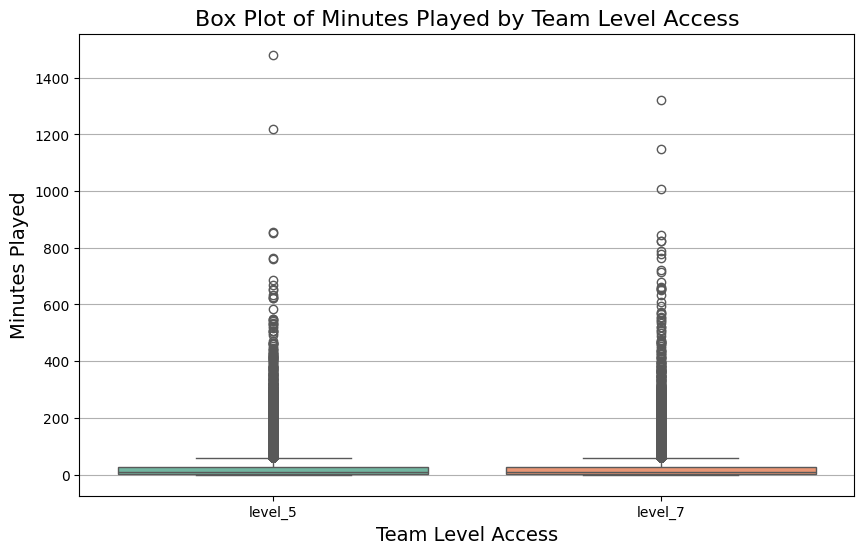

In [ ]:
# 1. Create a box plot to visualize minutes played by team level access
plt.figure(figsize=(10, 6))
sns.boxplot(x='team_level_access', y='minutes_played', data=df, palette='Set2')

# Customize the plot
plt.title('Box Plot of Minutes Played by Team Level Access', fontsize=16)
plt.xlabel('Team Level Access', fontsize=14)
plt.ylabel('Minutes Played', fontsize=14)
plt.grid(axis='y')

# Show the plot
plt.show()

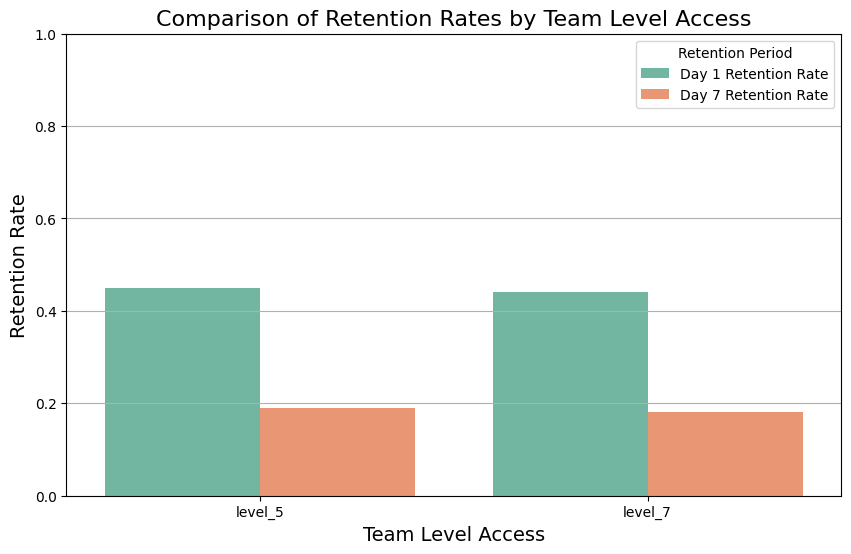

In [ ]:
# 1. Calculate Day 1 and Day 7 retention rates by team level access
day1_retention_rate = df.groupby('team_level_access')['day1_retention'].mean().reset_index()
day7_retention_rate = df.groupby('team_level_access')['day7_retention'].mean().reset_index()

# 2. Merge retention rates into a single DataFrame
retention_analysis = day1_retention_rate.merge(day7_retention_rate, on='team_level_access', suffixes=('_day1', '_day7'))

# Rename columns for clarity
retention_analysis.columns = ['Team Level Access', 'Day 1 Retention Rate', 'Day 7 Retention Rate']

# 3. Melt the DataFrame for easier plotting
retention_melted = retention_analysis.melt(id_vars='Team Level Access',
                                            value_vars=['Day 1 Retention Rate', 'Day 7 Retention Rate'],
                                            var_name='Retention Period',
                                            value_name='Retention Rate')

# 4. Create a bar plot to visualize the retention rates comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Team Level Access', y='Retention Rate', hue='Retention Period', data=retention_melted, palette='Set2')

# Customize the plot
plt.title('Comparison of Retention Rates by Team Level Access', fontsize=16)
plt.ylabel('Retention Rate', fontsize=14)
plt.xlabel('Team Level Access', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better readability
plt.legend(title='Retention Period')
plt.grid(axis='y')

# Show the plot
plt.show()

# Build a P-value interpreter function with ChatGPT

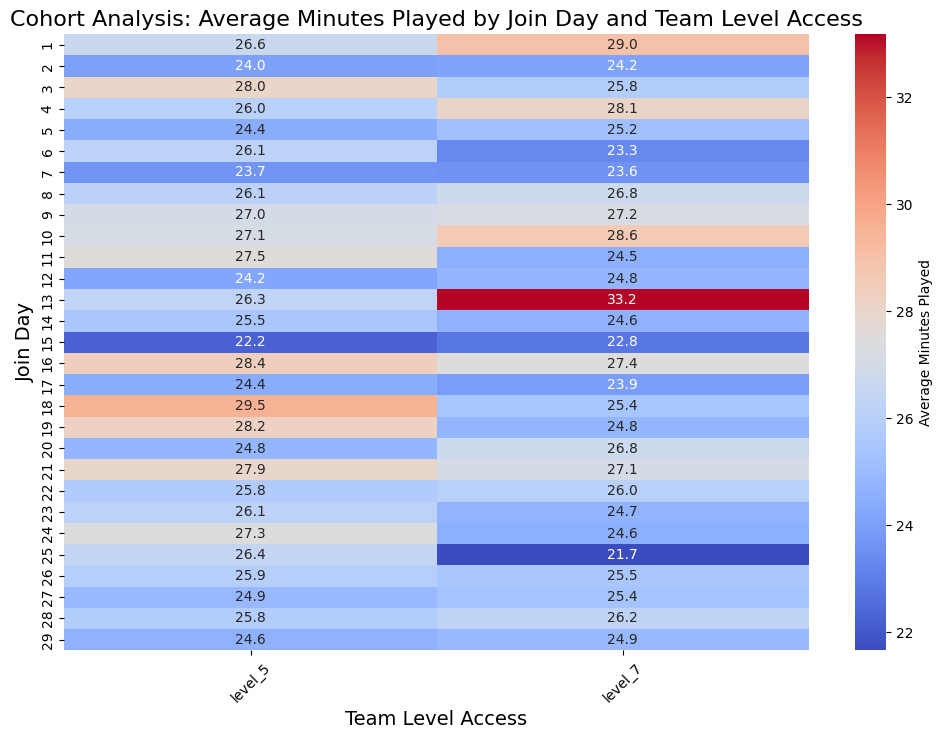

In [ ]:
# Sample dataset structure assumed for cohort analysis
# df['join_day'] represents the day the player joined
# df['days_played'] is a count of the days since the player joined the game
# These columns are typically necessary for cohort analysis

# Grouping the data by team_level_access and join_day and calculating the mean minutes played
# Assuming 'join_day' represents the day the player joined
df['join_day'] = np.random.randint(1, 30, df.shape[0])  # Simulating join_day data

cohort_data = df.groupby(['team_level_access', 'join_day']).agg({'minutes_played': 'mean'}).reset_index()

# Pivot the data to have join_day as rows and team_level_access as columns
cohort_pivot = cohort_data.pivot(index='join_day', columns='team_level_access', values='minutes_played')

# Plot the cohort heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average Minutes Played'})
plt.title('Cohort Analysis: Average Minutes Played by Join Day and Team Level Access', fontsize=16)
plt.ylabel('Join Day', fontsize=14)
plt.xlabel('Team Level Access', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-9d578862b4c3>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_counts = df.groupby(['team_level_access', 'minutes_played_category']).size().unstack(fill_value=0)


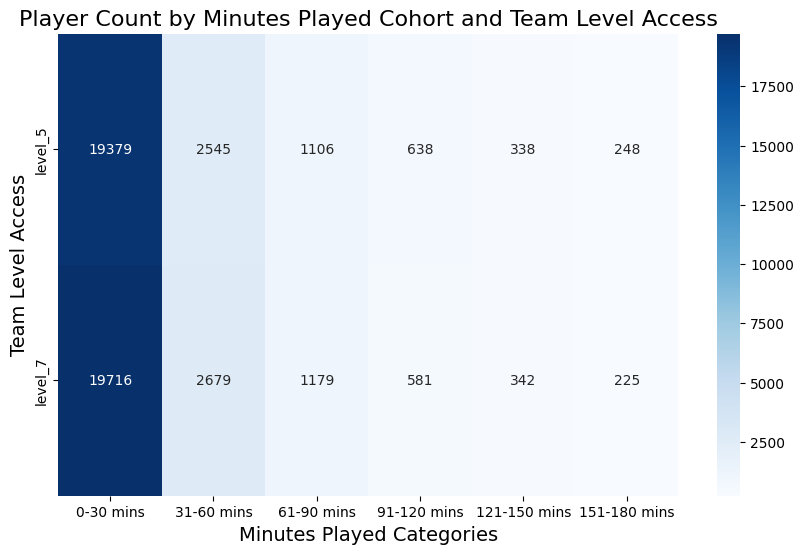

In [ ]:
# Step 1: Define time intervals (bins) for minutes played
bins = [0, 30, 60, 90, 120, 150, 180]  # You can adjust these based on your data
labels = ['0-30 mins', '31-60 mins', '61-90 mins', '91-120 mins', '121-150 mins', '151-180 mins']

# Step 2: Categorize players into bins based on minutes played
df['minutes_played_category'] = pd.cut(df['minutes_played'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Create a cohort matrix
# Count the number of players in each 'minutes_played_category' for each 'team_level_access'
cohort_counts = df.groupby(['team_level_access', 'minutes_played_category']).size().unstack(fill_value=0)

# Step 4: Visualize the cohort as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_counts, annot=True, cmap="Blues", fmt="d")

# Customize the plot
plt.title('Player Count by Minutes Played Cohort and Team Level Access', fontsize=16)
plt.xlabel('Minutes Played Categories', fontsize=14)
plt.ylabel('Team Level Access', fontsize=14)
plt.show()

#Outlier

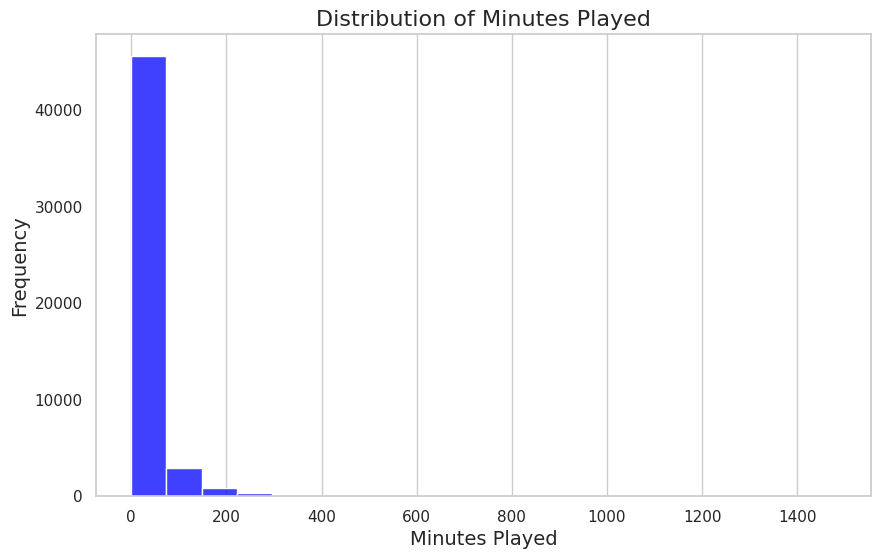

In [ ]:
#let's create a hist to see how the data is visual distributed

# Set the style for the plot
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], bins=20, kde=False, color='blue')

# Customize the plot
plt.title('Distribution of Minutes Played', fontsize=16)
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')

# Show the plot
plt.show()

# so is not normal

#Remove outliers with the Quartile method

In [ ]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['minutes_played'].quantile(0.25)
Q3 = df['minutes_played'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers from the 'minutes_played' column based on the bounds
df_cleaned = df[(df['minutes_played'] >= lower_bound) & (df['minutes_played'] <= upper_bound)]

# Show the first few rows of the cleaned DataFrame
df_cleaned.describe()

,id,minutes_played,join_day
count,4.431900e+04,44319.000000,44319.000000
mean,4.993766e+08,12.208240,15.014125
std,2.893929e+08,13.750095,8.390100
min,7.746000e+03,0.000000,1.000000
25%,2.491266e+08,2.000000,8.000000
50%,5.000784e+08,7.000000,15.000000
75%,7.496319e+08,17.000000,22.000000
max,9.999952e+08,60.000000,29.000000


In [ ]:
def interpret_p_value(p_value, threshold=0.05):
    """
    Interpret the p-value in a statistical context against a specific threshold.

    Parameters:
    p_value (float): The p-value to interpret, expected to be in the range 0 to 1.
    threshold (float): The significance level threshold, default is 0.05.

    Returns:
    None: Prints the interpretation of the p-value.

    Raises:
    ValueError: If the p_value or threshold is not within the range [0, 1].

    Description:
    This function assesses the provided p-value against a given threshold:
    - p < threshold: Evidence suggests rejecting the null hypothesis.
    - p >= threshold: Not enough evidence to reject the null hypothesis.

    It's important to note that the interpretation of p-values is context-dependent
    and should be considered along with other factors in statistical analysis.
    """
    if not (0 <= p_value <= 1):
        raise ValueError("p_value must be between 0 and 1.")
    if not (0 <= threshold <= 1):
        raise ValueError("threshold must be between 0 and 1.")

    if p_value < threshold:
        print(f"p-value ({p_value}) is less than the threshold ({threshold}).")
        print("Evidence suggests rejecting the null hypothesis.")
    else:
        print(f"p-value ({p_value}) is greater than or equal to the threshold ({threshold}).")
        print("Not enough evidence to reject the null hypothesis.")

# Example usage
interpret_p_value(0.03, threshold=0.05)

p-value (0.03) is less than the threshold (0.05).
Evidence suggests rejecting the null hypothesis.


#Ramdomization

###Simple ramdomization

In [ ]:
number_of_users = 500

In [ ]:
# let say 1 is for group A and 0 is for group B

group_assignment = np.random.choice([0,1],
                                    size =
                                    number_of_users, p = [0.5, 0.5])

# Count the number of elements per group
np.unique(group_assignment, return_counts = True)


(array([0, 1]), array([262, 238]))

###Block Ramdomization

In [ ]:
def block_randomization(total_users, block_size):
    # Ensure total_users is a multiple of block_size
    if total_users % block_size != 0:
        raise ValueError("total_users must be a multiple of block_size.")

    # Create an array for group assignments (0 and 1)
    group_assignment = []

    # Number of blocks
    num_blocks = total_users // block_size

    for _ in range(num_blocks):
        # Create a block of assignments
        block = np.random.choice([0, 1], size=block_size, p=[0.5, 0.5])
        group_assignment.extend(block)

    # Shuffle the overall group assignment to randomize block order
    np.random.shuffle(group_assignment)

    return group_assignment

# Example usage
total_users = 200  # Total number of participants
block_size = 50    # Size of each block

randomized_groups = block_randomization(total_users, block_size)
# Count the number of elements in each group
group_counts = np.bincount(randomized_groups)
print("Group assignment counts:")
print(f"Placebo (0): {group_counts[0]}")
print(f"Drug (1): {group_counts[1]}")

Group assignment counts:
Placebo (0): 101
Drug (1): 99


###Stratified Randomization

In [ ]:
#Build a copy of data frame
#Create an age group variable
#create a function
#apply the function
#Check results

In [ ]:
df_stratified = df.copy()

In [ ]:
age_groups = ['18-25', '26-34', '36-45', '46-55']
df_stratified['age_group'] = np.random.choice(age_groups,
                                              size = len(df_stratified),
                                              replace = True)
df_stratified.head()

,id,team_level_access,minutes_played,day1_retention,day7_retention,join_day,minutes_played_category,age_group
0,250642234,level_5,21,True,False,18,0-30 mins,26-34
1,330729049,level_5,1,False,False,19,0-30 mins,18-25
2,955307973,level_7,76,True,True,18,61-90 mins,36-45
3,908651903,level_7,76,True,False,21,61-90 mins,18-25
4,983320188,level_5,1,False,False,19,0-30 mins,46-55


In [ ]:


def stratified_randomization(df, age_groups, n_per_group=None):
    """
    Perform stratified randomization on the provided DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame to be stratified.
    age_groups (list): List of age groups to stratify by.
    n_per_group (int, optional): Number of samples to draw from each age group.
                                  If None, will sample equally from the entire population.

    Returns:
    pd.DataFrame: DataFrame with additional 'age_group' and 'group_assignment' columns.
    """

    # Ensure the DataFrame is a copy
    df_stratified = df.copy()

    # Assign age groups randomly
    df_stratified['age_group'] = np.random.choice(age_groups, size=len(df_stratified), replace=True)

    # Create a new column for group assignment (A and B)
    unique_groups = ['A', 'B']

    if n_per_group is not None:
        # Ensure enough entries exist for each group
        counts = df_stratified.groupby('age_group').size()
        for group in age_groups:
            if counts.get(group, 0) < n_per_group:
                raise ValueError(f"Not enough entries for age group {group} to sample {n_per_group} instances.")

        # Sample from each age group
        sampled_data = []
        for group in age_groups:
            group_data = df_stratified[df_stratified['age_group'] == group]
            # Randomly assign to A or B within each group
            group_data['group_assignment'] = np.random.choice(unique_groups, size=len(group_data))
            sampled_data.append(group_data.sample(n=n_per_group, replace=False))

        df_stratified = pd.concat(sampled_data).reset_index(drop=True)
    else:
        # Randomly assign group assignment if no n_per_group specified
        df_stratified['group_assignment'] = np.random.choice(unique_groups, size=len(df_stratified))

    return df_stratified

# Example usage
# Assuming df is your original DataFrame
age_groups = ['18-25', '26-34', '36-45', '46-55']
df_stratified = stratified_randomization(df, age_groups)

# Display the head of the stratified DataFrame
df_stratified.head()

,id,team_level_access,minutes_played,day1_retention,day7_retention,join_day,minutes_played_category,age_group,group_assignment
0,250642234,level_5,21,True,False,18,0-30 mins,26-34,A
1,330729049,level_5,1,False,False,19,0-30 mins,18-25,A
2,955307973,level_7,76,True,True,18,61-90 mins,46-55,A
3,908651903,level_7,76,True,False,21,61-90 mins,36-45,A
4,983320188,level_5,1,False,False,19,0-30 mins,36-45,A


In [ ]:
# Check the results
df_stratified.groupby(['age_group', 'group_assignment']).size()

age_group  group_assignment
18-25      A                   6255
           B                   6297
26-34      A                   6202
           B                   6315
36-45      A                   6082
           B                   6254
46-55      A                   6376
           B                   6219
dtype: int64

###Cluster randomization

In [ ]:
# Build a copy from our df
clustering_df = df.copy()

In [ ]:
# Create a city variable
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston']
clustering_df['city'] = np.random.choice(cities,
                                              size = len(clustering_df),
                                              replace = True)
clustering_df.head()

,id,team_level_access,minutes_played,day1_retention,day7_retention,join_day,minutes_played_category,city
0,250642234,level_5,21,True,False,18,0-30 mins,New York
1,330729049,level_5,1,False,False,19,0-30 mins,New York
2,955307973,level_7,76,True,True,18,61-90 mins,Houston
3,908651903,level_7,76,True,False,21,61-90 mins,Los Angeles
4,983320188,level_5,1,False,False,19,0-30 mins,Chicago


In [ ]:
# create a list with two cities in one cluster and 2 in anoter
assigned_clusters = [0, 0 ,1, 1]
np.random.shuffle(assigned_clusters)

In [ ]:
# Create a dictionary to map out the city and the assigned cluster
city_to_group = dict(zip(cities, assigned_clusters))
city_to_group

{'New York': 0, 'Los Angeles': 1, 'Chicago': 0, 'Houston': 1}

In [ ]:
# Create the cluster group variable
clustering_df['cluster_group'] = clustering_df['city'].map(city_to_group)
clustering_df.head()

,id,team_level_access,minutes_played,day1_retention,day7_retention,join_day,minutes_played_category,city,cluster_group
0,250642234,level_5,21,True,False,18,0-30 mins,New York,0
1,330729049,level_5,1,False,False,19,0-30 mins,New York,0
2,955307973,level_7,76,True,True,18,61-90 mins,Houston,1
3,908651903,level_7,76,True,False,21,61-90 mins,Los Angeles,1
4,983320188,level_5,1,False,False,19,0-30 mins,Chicago,0


In [ ]:
# Check the results
clustering_df.groupby(['city', 'cluster_group']).size()

,,0
city,cluster_group,
Chicago,0,12518
Houston,1,12449
Los Angeles,1,12413
New York,0,12620


#Sample size calculation

In [ ]:
# Settings
alpha = 0.05
power = 0.8
# Minimum Detectable effect
mde = 0.05

### Sample Size Calculation for Proportions

In [ ]:
#Computing the baseline for level 5 players in day 7 %

In [ ]:
# Computing the Baseline %
baseline_retention = df_cleaned[
    df_cleaned['team_level_access'] == 'level_5']['day7_retention'].mean()
print(f"The Baseline Retention is {baseline_retention}")


The Baseline Retention is 0.11644772851669404


In [ ]:
# Calculate the effect size
effect_size = sm.stats.proportion_effectsize(baseline_retention,
                                             baseline_retention + mde)
print(effect_size)

-0.14400018988992425


In [ ]:
# Initiate the power analysis
power_analysis = sm.stats.NormalIndPower()
sample_size_discrete = power_analysis.solve_power(effect_size = effect_size,
                                                  power = power,
                                                  alpha = alpha,
                                                  ratio = 1.0)
print(f"The Sample Size per group is {round(sample_size_discrete)}")



The Sample Size per group is 757


###Sample size for continuos outcomes

In [ ]:
# Computing the Baseline minutes
baseline_minutes = df_cleaned[
    df_cleaned['team_level_access'] == 'level_5']['minutes_played'].mean()
print(f"The Baseline minutes is {baseline_minutes}")

# Baseline variability
baseline_sigma = df_cleaned[
    df_cleaned['team_level_access'] == 'level_5']['minutes_played'].std()
print(f"The Baseline Variability is {baseline_sigma}")


The Baseline minutes is 12.262953840540048
The Baseline Variability is 13.63398872144121


In [ ]:

# Compute the effect size
effect_size = mde * baseline_minutes / baseline_sigma
print(f"The effect size is {effect_size}")


The effect size is 0.044971996424109435


In [ ]:
# Alpha and Beta
Zalpha = stats.norm.ppf(1-alpha / 2)
Zbeta = stats.norm.ppf(power)

In [ ]:
# Calculate the Sample size
sample_size_continuous = (
    (Zalpha + Zbeta)**2 * (baseline_sigma**2)) / (effect_size **2)
print(f"The Sample Size per group is {sample_size_continuous:.0f}")

The Sample Size per group is 721388


Pro Tip 1 :Always clean outliers for A/B Testing

Pro Tip 2: Choose the proportion as the main outcome KPI and the continuous as secondary

#Post Analysis

###Post analysis for retention with calculated sample size

In [ ]:
# Sampling
N = int(sample_size_discrete)
sample5 = df_cleaned[df_cleaned['team_level_access'] == 'level_5']

sample7 = df_cleaned[df_cleaned['team_level_access'] == 'level_7']

In [ ]:
# Calculating the number of successes and trials
n_5= sample5['day7_retention'].count()
n_7= sample7['day7_retention'].count()
successes_5= sample5['day7_retention'].sum()
successes_7= sample7['day7_retention'].sum()

In [ ]:
# Compute the level access retention rate
rr_5 = successes_5 / n_5
rr_7 = successes_7 / n_7
print(f"The Retention Rate for level 5 is {rr_5}")
print(f"The Retention Rate for level 7 is {rr_7}")

The Retention Rate for level 5 is 0.11644772851669404
The Retention Rate for level 7 is 0.10877427997320831


In [ ]:
# Proportions Test
import statsmodels.stats.proportion as proportion
z_value, p_value = proportion.proportions_ztest([successes_5, successes_7], [n_5, n_7],
                                                alternative = "two-sided")
interpret_p_value(p_value, threshold=0.05)

p-value (0.010607771169938515) is less than the threshold (0.05).
Evidence suggests rejecting the null hypothesis.


###Post analysis with the complete data

In [ ]:
# Prepare the inputs
minutes5 = df_cleaned[df_cleaned['team_level_access'] == 'level_5']['minutes_played']

minutes7 = df_cleaned[df_cleaned['team_level_access'] == 'level_7']['minutes_played']

In [ ]:
# 2 sample T-test
t_statistic, p_value = stats.ttest_ind(minutes5,
                                       minutes7,
                                       alternative = 'two-sided')
interpret_p_value(p_value, threshold=0.05)

p-value (0.40720311949312926) is greater than or equal to the threshold (0.05).
Not enough evidence to reject the null hypothesis.


###Dataset Structure
The dataset includes the following key variables:

id: Unique identifier for each player.
team_level_access: Experimental group assignment indicating whether the player is in level 5 or level 7 access.
minutes_played: Total minutes the player engaged with the game.
day1_retention: A boolean indicating whether the player returned on the first day after joining.
day7_retention: A boolean indicating whether the player returned on the seventh day.
Insights and Conclusions
Retention Rates:

The analysis provides insights into the retention rates of players in different access groups. By comparing the day 1 and day 7 retention rates for both levels, the project assesses whether one group has a statistically significant advantage over the other. This can help identify which access level fosters greater engagement and loyalty among players.
Minutes Played:

The evaluation of average and median minutes played by each team level access group reveals patterns of player engagement. The box plots and histograms show the distribution of playtime, allowing for the identification of outliers and general trends in player behavior.
Statistical Significance:

The use of hypothesis testing (null vs. alternative hypothesis) helps determine whether the observed differences in engagement and retention are statistically significant. A function to interpret p-values assists in making data-driven conclusions about the effectiveness of each access level.
Outlier Impact:

The project identifies and addresses outliers in the minutes played data. Cleaning the data improves the quality of insights derived from subsequent analyses.
Cohort Analysis:

A cohort analysis is conducted to visualize average minutes played over different join days, providing a deeper understanding of how player behavior evolves over time in relation to their team access level.
Conclusion
In conclusion, this project serves as a comprehensive analysis of how different team access levels impact player engagement and retention in a gaming environment. The findings will help inform future game design and development strategies, particularly regarding how access levels can be optimized to enhance player experience and improve retention metrics.

By understanding the nuances of player behavior associated with each access level, developers can make informed decisions that potentially lead to higher player satisfaction and retention, ultimately benefiting the game's longevity and success.